In [1]:
try:
    from tools.utils import EnvironmentDirOptions
except:
    !wget --no-cache -O utils.py -q https://raw.githubusercontent.com/aclicona/Utils/main/MachineLearning/utils.py
    from utils import EnvironmentDirOptions

2024-06-07 02:29:10.742293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 02:29:10.742393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 02:29:11.013271: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
github_repo_path = "https://github.com/MoisesGuerreroUdeA/Monografia/archive/refs/heads/main-licona.zip"
repo_name = "Monografia"
env_token_key = "GITHUB_TOKEN"
env_dir_options = EnvironmentDirOptions()
env_dir_options.get_repo_from_git(github_repo_path, repo_name, env_token_key)
main_dir = env_dir_options.main_dir




Archive:  /kaggle/working/main-licona.zip
77d248864921674002f0f148e98b50ae8e33da44
   creating: /kaggle/working/Monografia-main-licona/
  inflating: /kaggle/working/Monografia-main-licona/.gitignore  
  inflating: /kaggle/working/Monografia-main-licona/1_Analisis_Exploratorio.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/2_Limpieza_Seleccion_Modelos.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/3_Preparacion_Datos.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/4_RNN.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/4_RNN_Andres.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/5_LSTM.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/6_GRU.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/7_ConvGRU.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/8_Lag-Llama.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/LSTM_models.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/LSTM_

In [3]:
import os
import pandas as pd
from keras import backend
import json

os.environ['LOG_LEVEL'] = 'INFO'
from tools.model_generation.generator import Generator
from tools.model_generation.trainer import Trainer
from tools.model_generation.evaluator import ModelEvaluator
from tools.utils import DataSelectionForEvaluator, load_scaler, save_scaler

In [4]:
dataset = pd.read_feather(os.path.join(main_dir, 'data', 'dataset.feather'))

In [5]:
json_config_path = os.path.join(main_dir, "config/config_models_ConvGRU_5.json")
file = open(json_config_path, 'r')
model_configurations = json.load(file)

model_generator = Generator()
trainer = Trainer()
model_save_dir = env_dir_options.save_dir_path("models/")

In [6]:
for model_conf in model_configurations:
    backend.clear_session()
    model = model_generator.generate_model(model_conf)
    training_params, scaler_x, scaler_y = trainer.train_model_params(model_conf, dataset, model_save_dir)
    history = model.fit(**training_params)
    trainer.save_history(model.name, history.history, model_save_dir)
    save_scaler(scaler_x, f'{model_save_dir}/{model.name}_scaler_x.pkl')
    save_scaler(scaler_y, f'{model_save_dir}/{model.name}_scaler_y.pkl')


Model: "ConvGRU_1_look72_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 64)         │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 71, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 71, 200)        │       159,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 71, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 71, 150)        │       158,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 71, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 71, 125)        │       103,875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 71, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 100)            │        68,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,295 (1.89 MB)

 Trainable params: 496,295 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
   1/3448 ━━━━━━━━━━━━━━━━━━━━ 22:56:47 24s/step - loss: 0.0032 - mae: 0.0470 - mse: 0.0065

I0000 00:00:1717727677.237505     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717727677.326369     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3448/3448 ━━━━━━━━━━━━━━━━━━━━ 186s 47ms/step - loss: 0.0068 - mae: 0.0771 - mse: 0.0135 - val_loss: 0.0099 - val_mae: 0.0933 - val_mse: 0.0199
Epoch 2/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 145s 42ms/step - loss: 0.0053 - mae: 0.0662 - mse: 0.0106 - val_loss: 0.0094 - val_mae: 0.0932 - val_mse: 0.0189
Epoch 3/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 145s 42ms/step - loss: 0.0051 - mae: 0.0649 - mse: 0.0101 - val_loss: 0.0085 - val_mae: 0.0880 - val_mse: 0.0170
Epoch 4/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 146s 42ms/step - loss: 0.0048 - mae: 0.0627 - mse: 0.0096 - val_loss: 0.0074 - val_mae: 0.0833 - val_mse: 0.0148
Epoch 5/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 146s 42ms/step - loss: 0.0045 - mae: 0.0610 - mse: 0.0091 - val_loss: 0.0071 - val_mae: 0.0827 - val_mse: 0.0143
Epoch 6/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 145s 42ms/step - loss: 0.0044 - mae: 0.0596 - mse: 0.0087 - val_loss: 0.0070 - val_mae: 0.0817 - val_mse: 0.0140
Epoch 7/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 145s 42ms/step - loss: 0.0042 - mae: 0.

Model: "ConvGRU_1_look72_overlap36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 64)         │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 71, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 71, 200)        │       159,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 71, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 71, 150)        │       158,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 71, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 71, 125)        │       103,875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 71, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 100)            │        68,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,295 (1.89 MB)

 Trainable params: 496,295 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
 3/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0125 - mae: 0.0917 - mse: 0.0249

W0000 00:00:1717733695.995471     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0305 - mae: 0.1716 - mse: 0.0610

W0000 00:00:1717733713.075480     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 202ms/step - loss: 0.0305 - mae: 0.1715 - mse: 0.0610 - val_loss: 0.0171 - val_mae: 0.1292 - val_mse: 0.0342
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0160 - mae: 0.1294 - mse: 0.0320 - val_loss: 0.0139 - val_mae: 0.1152 - val_mse: 0.0277
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0095 - mae: 0.0996 - mse: 0.0191 - val_loss: 0.0118 - val_mae: 0.1079 - val_mse: 0.0236
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0067 - mae: 0.0829 - mse: 0.0135 - val_loss: 0.0144 - val_mae: 0.1114 - val_mse: 0.0288
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0075 - mae: 0.0852 - mse: 0.0151 - val_loss: 0.0124 - val_mae: 0.1089 - val_mse: 0.0248
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0059 - mae: 0.0745 - mse: 0.0117 - val_loss: 0.0122 - val_mae: 0.1044 - val_mse: 0.0244
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0057 - mae: 0.0718 - mse: 0.0113 - val_loss: 0.0116 - 

Model: "ConvGRU_1_look72_overlap72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 64)         │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 71, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 71, 200)        │       159,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 71, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 71, 150)        │       158,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 71, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 71, 125)        │       103,875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 71, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 100)            │        68,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,295 (1.89 MB)

 Trainable params: 496,295 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
 3/48 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0226 - mae: 0.1201 - mse: 0.0452

W0000 00:00:1717733790.047728     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/48 ━━━━━━━━━━━━━━━━━━━━ 36s 386ms/step - loss: 0.0305 - mae: 0.1672 - mse: 0.0609 - val_loss: 0.0159 - val_mae: 0.1188 - val_mse: 0.0318
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0106 - mae: 0.1046 - mse: 0.0212 - val_loss: 0.0148 - val_mae: 0.1138 - val_mse: 0.0297
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0073 - mae: 0.0860 - mse: 0.0145 - val_loss: 0.0151 - val_mae: 0.1171 - val_mse: 0.0303
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0070 - mae: 0.0828 - mse: 0.0141 - val_loss: 0.0149 - val_mae: 0.1141 - val_mse: 0.0298
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0059 - mae: 0.0752 - mse: 0.0118 - val_loss: 0.0152 - val_mae: 0.1130 - val_mse: 0.0303
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0056 - mae: 0.0720 - mse: 0.0111 - val_loss: 0.0150 - val_mae: 0.1128 - val_mse: 0.0301
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0056 - mae: 0.0715 - mse: 0.0113 - val_loss: 0.0149 - 

Scaler loaded using joblib from /kaggle/working/data/models_trained/ConvGRU_1_look72_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/data/models_trained/ConvGRU_1_look72_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


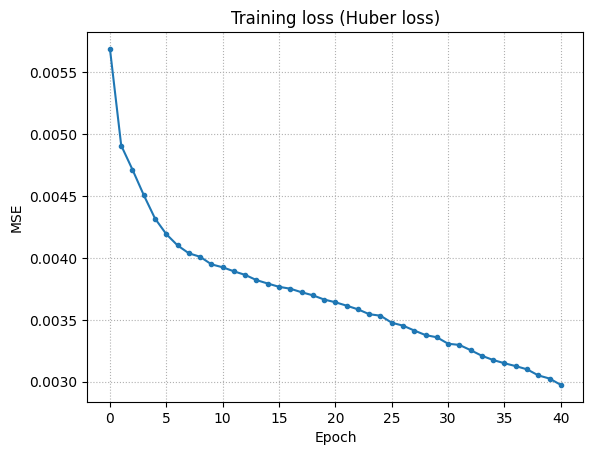

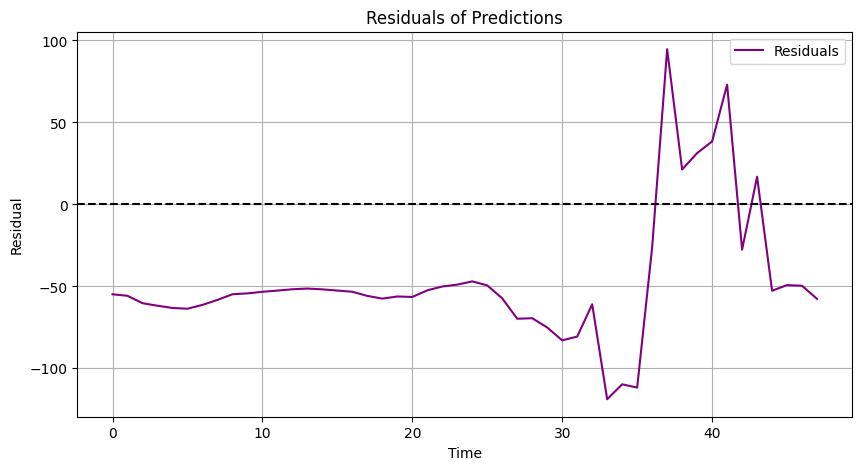

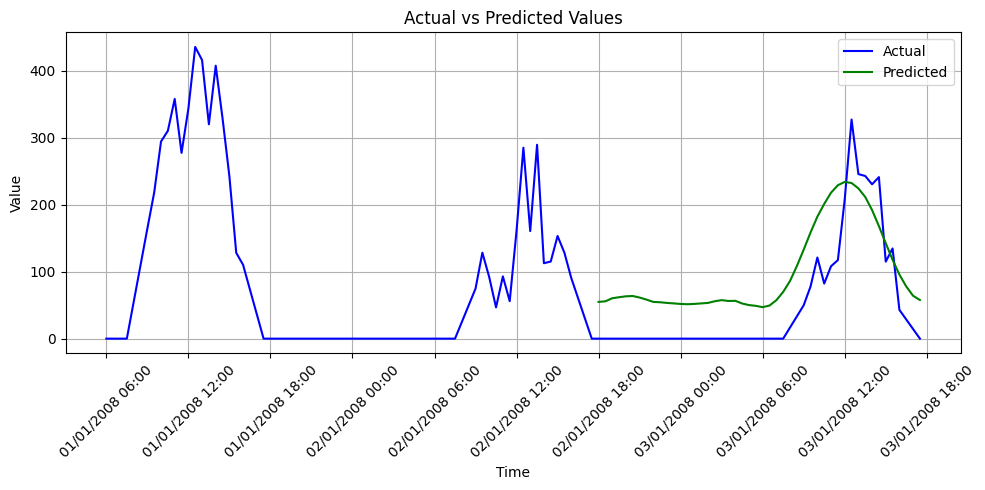

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


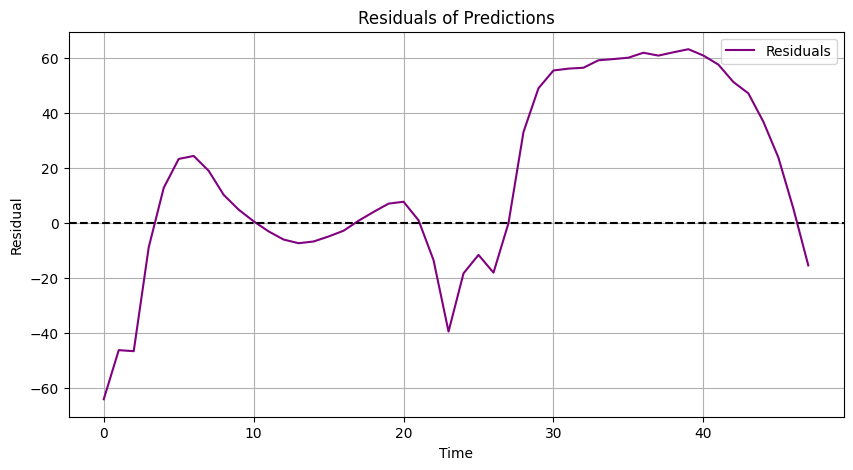

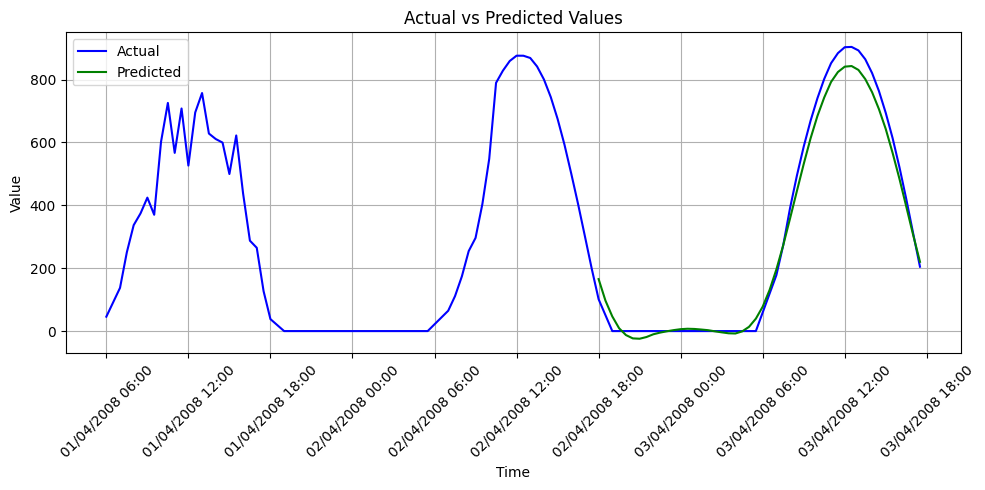

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


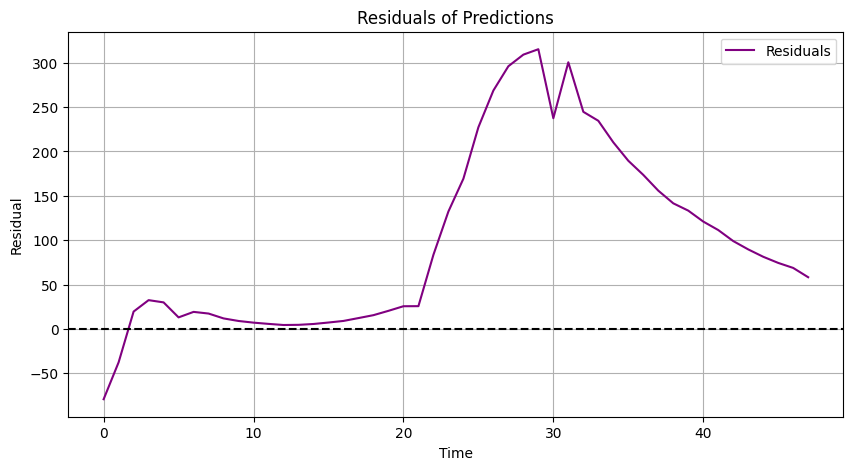

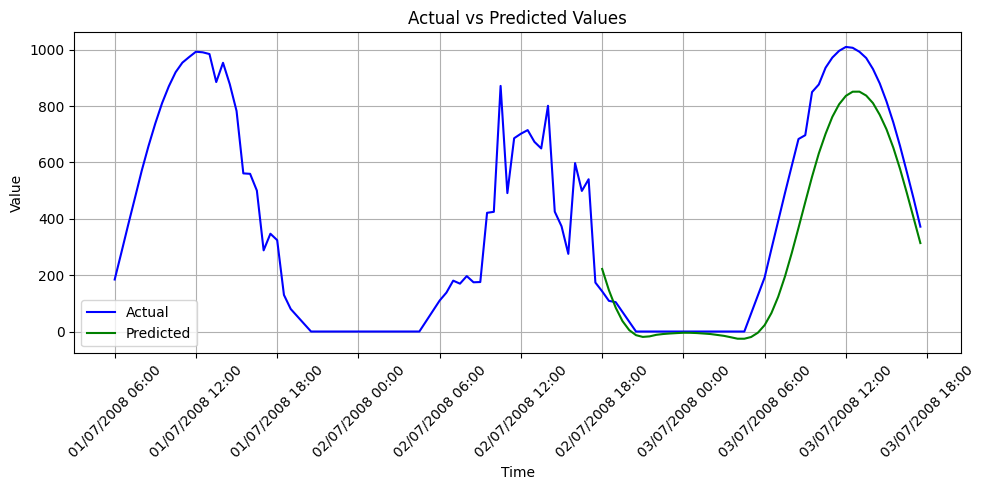

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


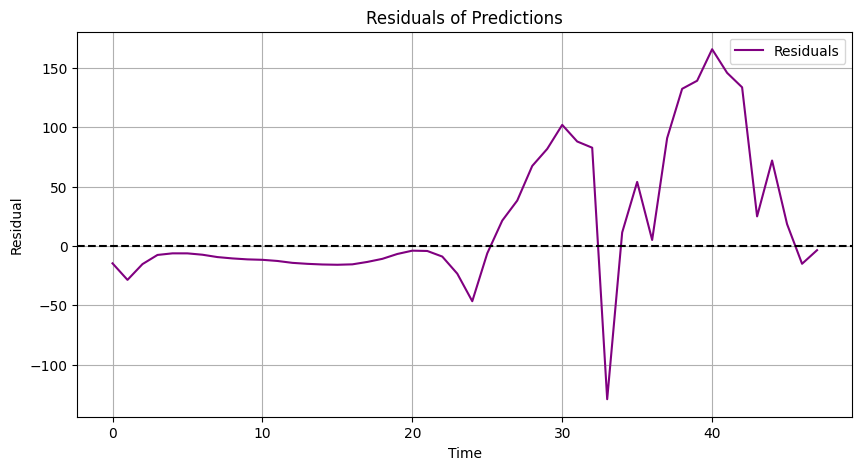

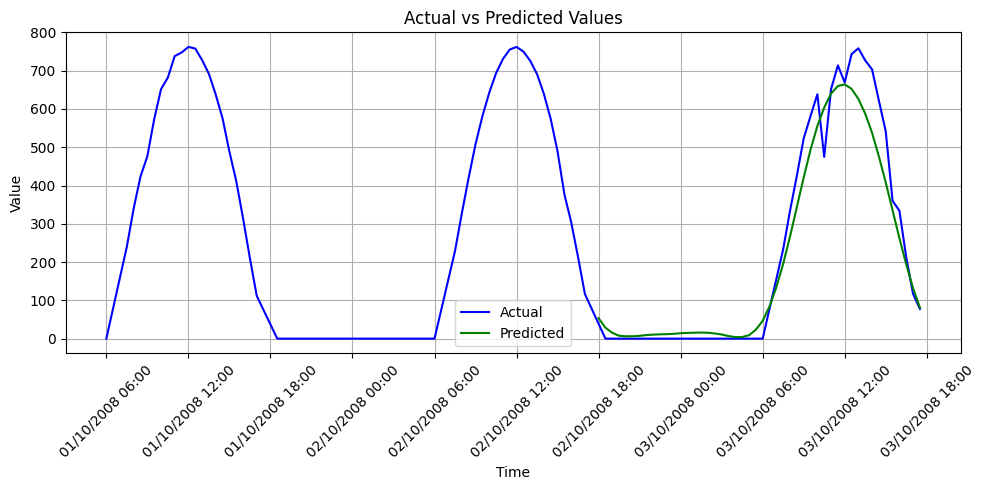

Scaler loaded using joblib from /kaggle/working/data/models_trained/ConvGRU_1_look72_overlap36_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/data/models_trained/ConvGRU_1_look72_overlap36_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


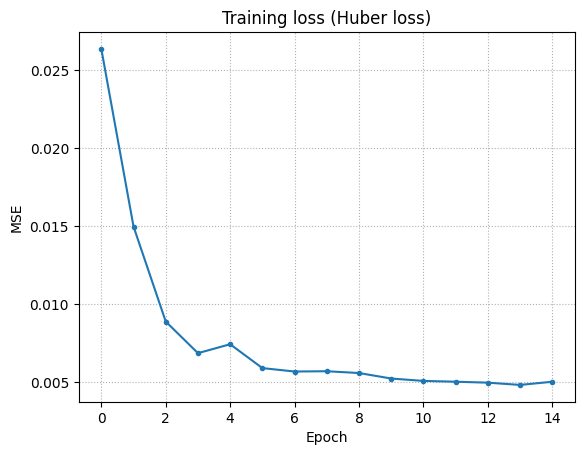

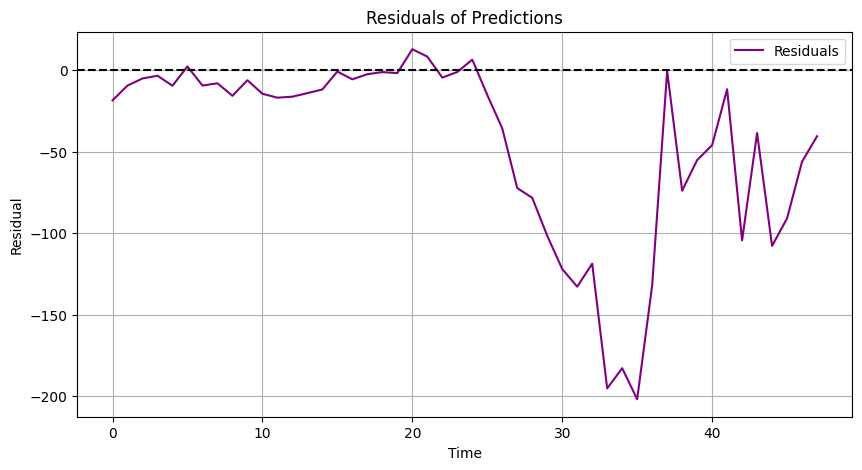

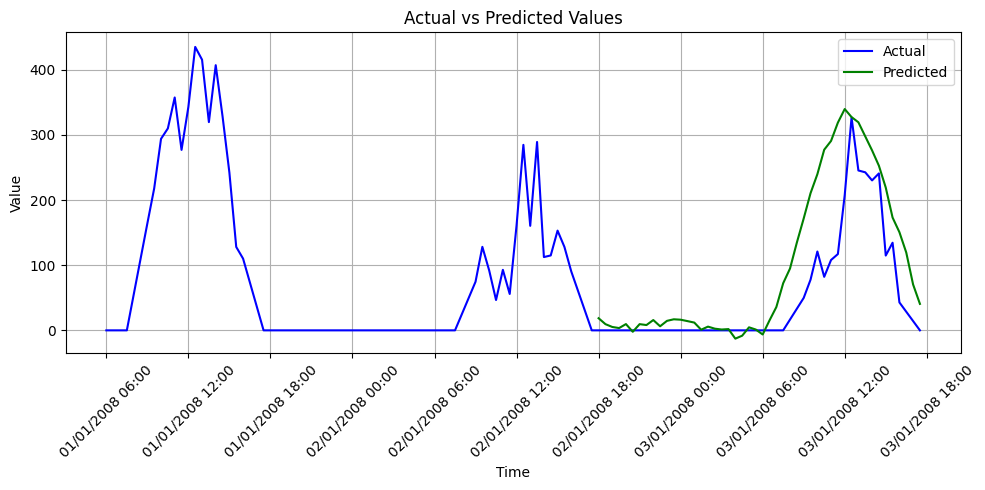

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


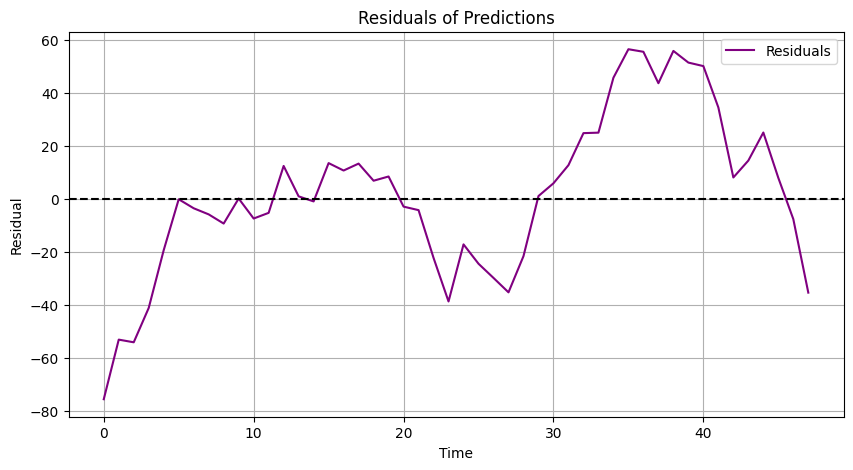

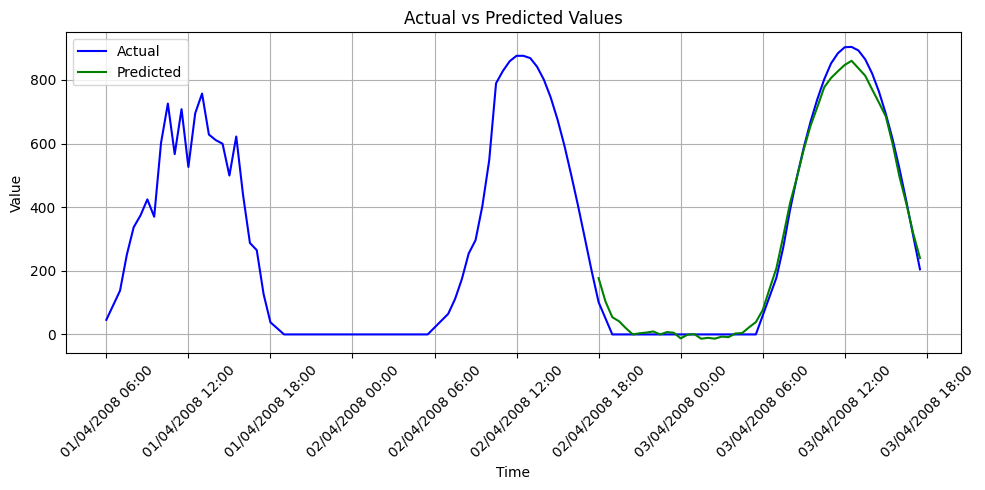

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


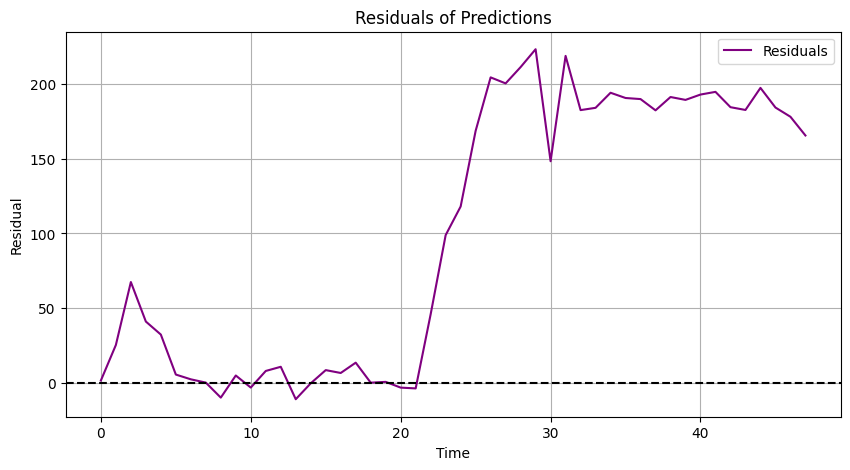

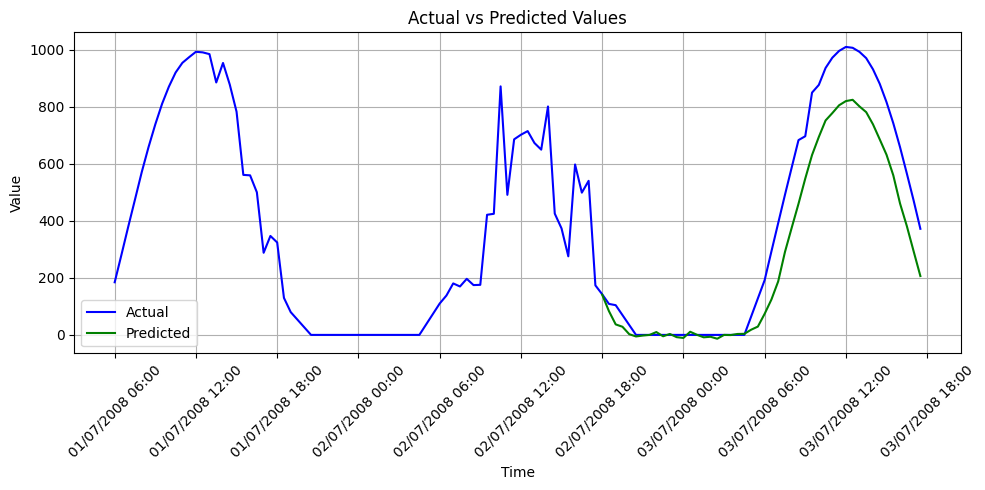

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


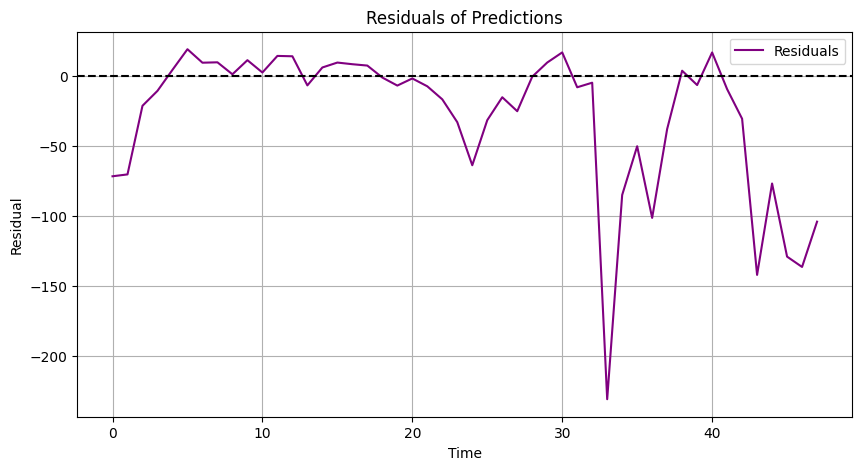

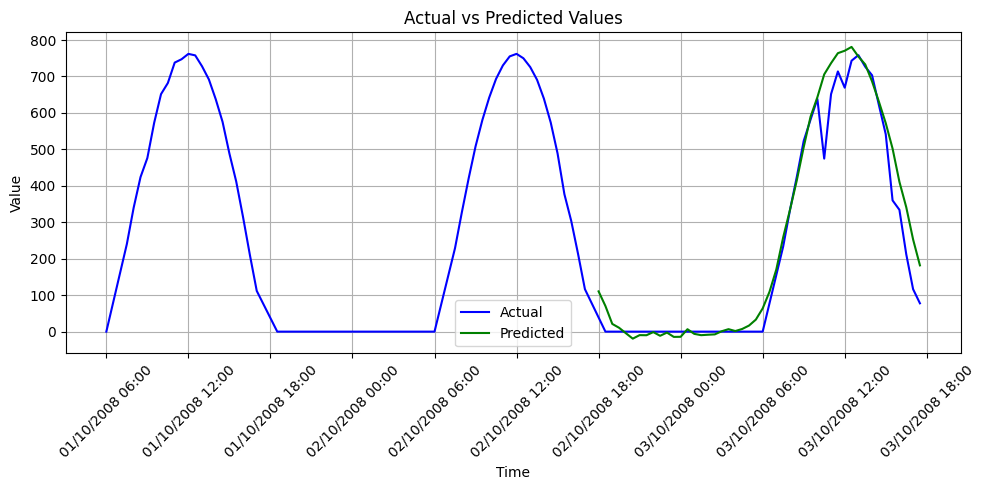

Scaler loaded using joblib from /kaggle/working/data/models_trained/ConvGRU_1_look72_overlap72_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/data/models_trained/ConvGRU_1_look72_overlap72_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


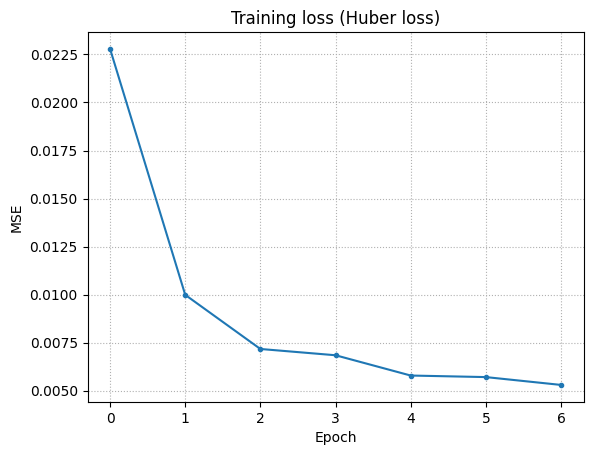

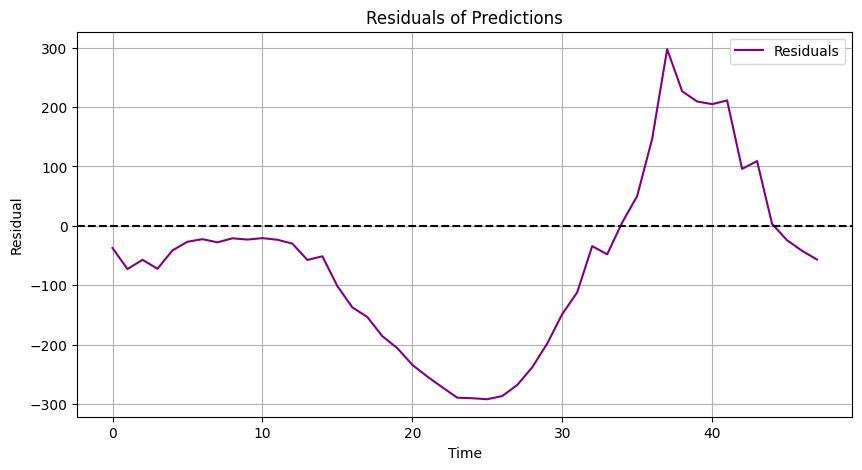

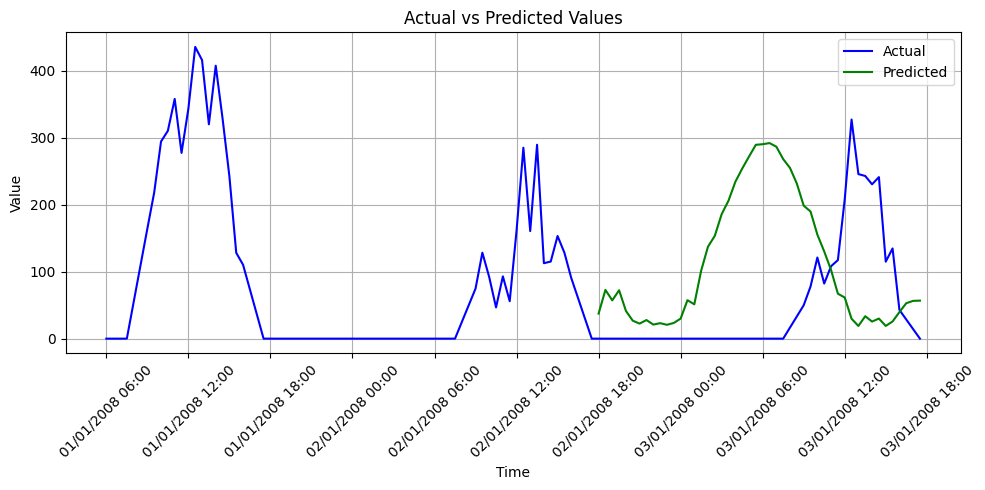

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


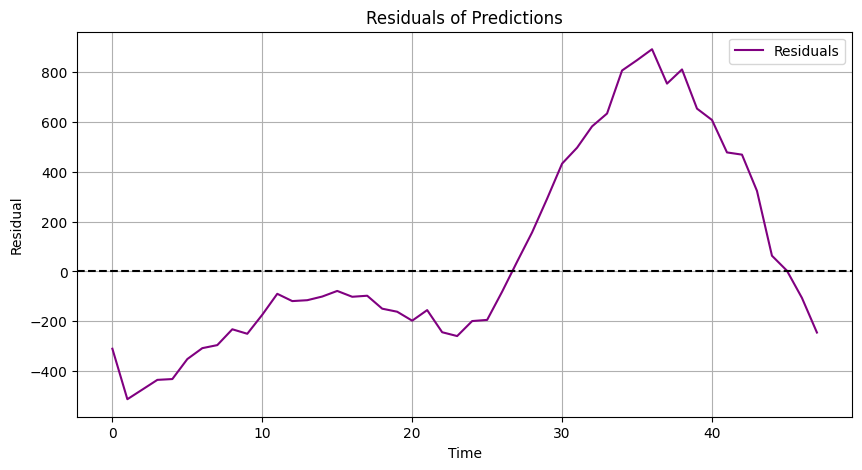

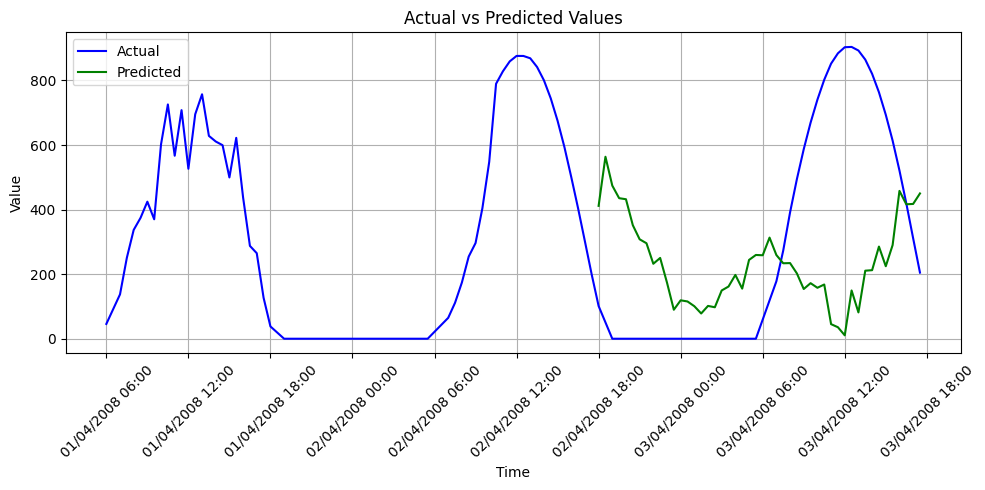

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


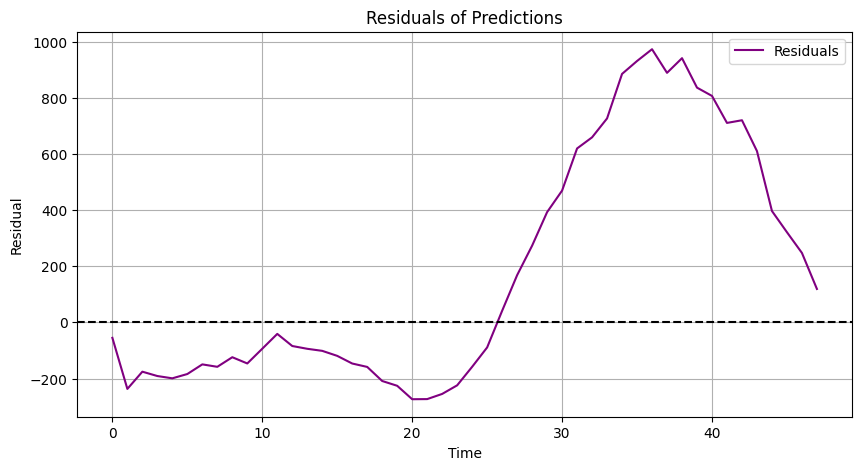

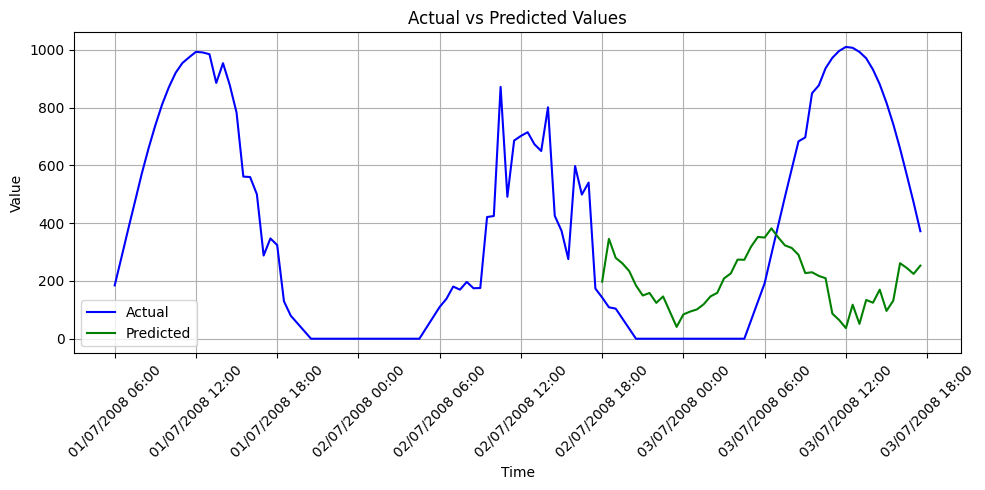

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


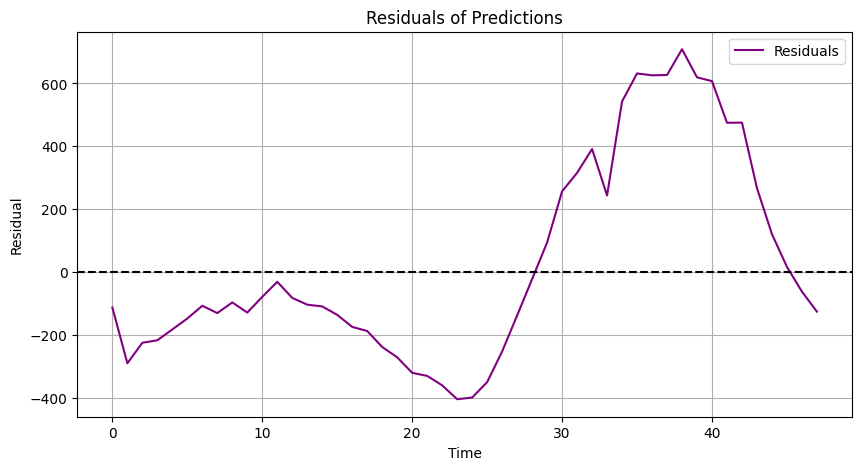

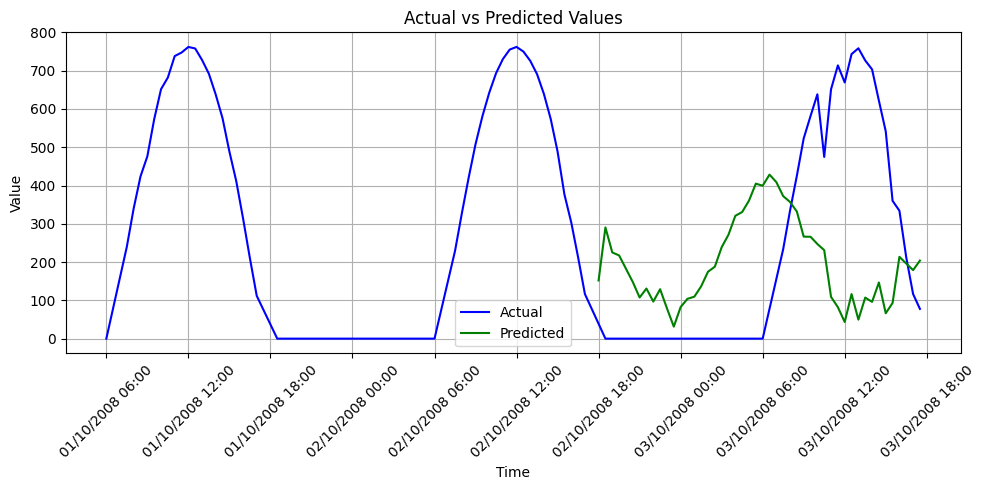

In [7]:
data_for_eval = DataSelectionForEvaluator(dataset)
time_stamps = ['2008-01-01 06:00:00', '2008-04-01 06:00:00', '2008-07-01 06:00:00', '2008-10-01 06:00:00']
for model_conf in model_configurations:
    model = env_dir_options.load_model(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}.keras'))
    history = json.load(open(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_history.json')))
    scaler_x = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_x.pkl'))
    scaler_y = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_y.pkl'))

    # Evaluation of the model in different timestamps

    for iter, time_stamp in enumerate(time_stamps):
        y_true, y_pred, extended_y_true = data_for_eval.data_selection(model_=model,
                                                                       time_stamp=time_stamp,
                                                                       num_look_back_steps=model_conf["model"]["training"][
                                                                           "n_past_steps"],
                                                                       num_forecast_steps=model_conf["model"]["training"][
                                                                           "n_forecast_steps"],
                                                                       columns_for_training=
                                                                       model_conf["model"]["training"][
                                                                           "columns_for_training"],
                                                                       scaler_x=scaler_x,
                                                                       scaler_y=scaler_y,
                                                                       date_index="timestamp",
                                                                       target_column="GHI")
    
        evaluator = ModelEvaluator(y_true, y_pred)
        if iter == 0:
            evaluator.plot_loss(history, 'Huber loss')
        evaluator.plot_residuals()
        evaluator.plot_actual_vs_predicted(extended_y_true, model_conf["model"]["training"]["n_past_steps"])

In [8]:
!zip -r models.zip data/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: data/ (stored 0%)
  adding: data/models_trained/ (stored 0%)
  adding: data/models_trained/ConvGRU_1_look72_overlap36_history.json (deflated 60%)
  adding: data/models_trained/ConvGRU_1_look72_overlap36.keras (deflated 6%)
  adding: data/models_trained/ConvGRU_1_look72_overlap72.keras (deflated 6%)
  adding: data/models_trained/ConvGRU_1_look72_overlap72_history.json (deflated 59%)
  adding: data/models_trained/ConvGRU_1_look72_overlap1_scaler_x.pkl (deflated 39%)
  adding: data/models_trained/ConvGRU_1_look72_overlap36_scaler_y.pkl (deflated 44%)
  adding: data/models_trained/ConvGRU_1_look72_overlap36_scaler_x.pkl (deflated 39%)
  adding: data/models_trained/ConvGRU_1_look72_overlap1.keras (deflated 19%)
  adding: data/models_trained/ConvGRU_1_look72_overlap72_scaler_y.pkl (deflated 44%)
  adding: data/models_trained/ConvGRU_1_look72_overlap1_history.json (deflated 62%)
  adding: data/models_trained/ConvGRU_1_look72_overlap1_scaler_y.pkl (deflated 44%)
  adding: data/models